## Loading libraries and datasets

**Import libraries**

In [1]:
from buildingspy.io.outputfile import Reader
from buildingspy.io.postprocess import Plotter
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import datetime
import csv

In [105]:
data_file_name = "simulation_results_trial_4.mat"

result_file_name = data_file_name.rstrip('.mat')
simulation_data_raw = Reader(data_file_name, 'dymola')
var_names = simulation_data_raw.varNames()
print(var_names)

dict_keys(['boiCapRat', 'boilerPlant.mA_flow_nominal', 'boilerPlant.Q_flow_nominal', 'boilerPlant.boiCap1', 'boilerPlant.boiCap2', 'boilerPlant.boiEff1[1]', 'boilerPlant.boiEff1[2]', 'boilerPlant.boiEff1[3]', 'boilerPlant.boiEff1[4]', 'boilerPlant.boiEff1[5]', 'boilerPlant.boiEff1[6]', 'boilerPlant.boiEff2[1]', 'boilerPlant.boiEff2[2]', 'boilerPlant.boiEff2[3]', 'boilerPlant.boiEff2[4]', 'boilerPlant.boiEff2[5]', 'boilerPlant.boiEff2[6]', 'boilerPlant.TRadSup_nominal', 'boilerPlant.TRadRet_nominal', 'boilerPlant.mRad_flow_nominal', 'boilerPlant.TBoiSup_nominal', 'boilerPlant.TBoiRet_min', 'boilerPlant.mBoi_flow_nominal1', 'boilerPlant.mBoi_flow_nominal2', 'boilerPlant.V', 'boilerPlant.TAir_nominal', 'boilerPlant.zonTheCap', 'boilerPlant.uBoiSta[1]', 'boilerPlant.uBoiSta[2]', 'boilerPlant.uPumSta[1]', 'boilerPlant.uPumSta[2]', 'boilerPlant.uHotIsoVal[1]', 'boilerPlant.uHotIsoVal[2]', 'boilerPlant.uPumSpe', 'boilerPlant.uBypValSig', 'boilerPlant.QRooInt_flowrate', 'boilerPlant.uRadIsoVal

In [106]:
datapoints = {
    'boilerPlant.senVolFlo2.V_flow': 'boiler1_flowrate', 
    'boilerPlant.senTem3.T': 'boiler1_supply_temp', 
    'boilerPlant.senTem1.T': 'radiator_return_temp', 
    'boilerPlant.senVolFlo1.V_flow': 'boiler2_flowrate', 
    'boilerPlant.senTem2.T': 'boiler2_supply_temp', 
    'boilerPlant.pum.P': 'pump1_power',
    'boilerPlant.pum1.P': 'pump2_power',
    'boilerPlant.yZonTem': 'zone_temp',
    'boilerPlant.TOutAir': 'outdoor_air_temp',
    'boilerPlant.senTem.T': 'radiator_supply_temp',
    'boilerPlant.senVolFlo.V_flow': 'radiator_flowrate',
    'boilerPlant.boi1.T': 'boiler1_temp',
    'boilerPlant.boi.T': 'boiler2_temp',
    'boilerPlant.val1.y_actual': 'boiler1_isoVal_position',
    'boilerPlant.val2.y_actual': 'boiler2_isoVal_position',
    'boilerPlant.boi1.y': 'boiler1_actuatorSignal',
    'boilerPlant.boi.y': 'boiler2_actuatorSignal',
    'boilerPlant.boi1.QFue_flow': 'boiler1_fuelUse',
    'boilerPlant.boi.QFue_flow': 'boiler2_fuelUse',
    'boilerPlant.TBoiHotWatSupSet[1]': 'boiler1_supSet',
    'boilerPlant.TBoiHotWatSupSet[2]': 'boiler2_supSet',
    'boilerPlant.senRelPre1.p_rel': 'pumps_dP'}

In [107]:
simulation_data = pd.DataFrame()

for datapoint in list(datapoints):
#     print(datapoint)
    for var_name in var_names:
#         print(var_name)
        if datapoint == var_name:
#             print(var_name, "\n", datapoint)
            t, simulation_data[datapoints[datapoint]] = simulation_data_raw.values(var_name)

#                 print(zone)
#                 print(datapoint)

simulation_data['t'] = t
simulation_data.describe()

,boiler1_flowrate,boiler1_supply_temp,radiator_return_temp,boiler2_flowrate,boiler2_supply_temp,pump1_power,pump2_power,zone_temp,outdoor_air_temp,radiator_supply_temp,...,boiler1_isoVal_position,boiler2_isoVal_position,boiler1_actuatorSignal,boiler2_actuatorSignal,boiler1_fuelUse,boiler2_fuelUse,boiler1_supSet,boiler2_supSet,pumps_dP,t
count,3.615970e+05,361597.000000,361597.000000,3.615970e+05,361597.000000,3.615970e+05,361597.000000,361597.000000,361597.000000,361597.000000,...,3.615970e+05,3.615970e+05,361597.000000,361597.000000,361597.000000,361597.000000,361597.000000,361597.000000,361597.000000,361597.000000
mean,-9.380015e-05,339.487183,325.055420,-9.411559e-05,345.922729,2.089250e+00,0.392292,294.821045,270.465210,343.042725,...,6.456842e-01,6.352543e-01,0.410903,0.407232,7894.381348,2165.088623,343.150146,343.150146,-22580.837891,259114.765625
std,7.561075e-05,9.284448,7.495911,7.745455e-05,7.161656,5.875710e+00,1.798186,2.388133,1.504749,8.038160,...,4.739034e-01,4.794561e-01,0.481193,0.491278,9244.825195,2611.925537,0.000000,0.000000,22580.816406,49927.054688
min,-2.830614e-04,293.149994,292.661591,-2.829490e-04,293.149994,-4.385605e-34,-20.351398,288.891174,265.950012,293.149994,...,-1.319110e-08,-1.319110e-08,0.000000,0.000000,0.000000,0.000000,343.149994,343.149994,-93408.101562,172800.000000
25%,-1.417202e-04,342.246735,323.990753,-1.417244e-04,344.611298,0.000000e+00,-0.000000,293.214447,269.850006,344.279724,...,3.611644e-19,1.622481e-22,0.000000,0.000000,0.000000,0.000000,343.149994,343.149994,-26405.609375,215827.000000
50%,-1.417125e-04,343.104858,326.500427,-1.417164e-04,347.734467,1.123865e+00,0.984970,295.090515,270.350006,346.120697,...,9.999673e-01,1.000000e+00,0.000000,0.000000,0.000000,0.000000,343.149994,343.149994,-26404.236328,259105.000000
75%,-1.169311e-22,343.361053,330.152008,-2.082803e-26,349.511200,1.123948e+00,1.038341,296.427582,271.400269,346.410156,...,9.999752e-01,1.000000e+00,1.000000,1.000000,19212.294922,5316.592773,343.149994,343.149994,0.000000,302096.000000
max,4.049552e-17,349.205109,331.861298,7.475312e-27,353.639038,6.806322e+01,3.576610,300.807098,273.750397,348.102020,...,1.000000e+00,1.000000e+00,1.000000,1.000000,19212.294922,5316.592773,343.149994,343.149994,0.000000,345600.000000


In [108]:
simulation_data = simulation_data.drop_duplicates(subset=['t'], keep='last')
simulation_data.describe()

,boiler1_flowrate,boiler1_supply_temp,radiator_return_temp,boiler2_flowrate,boiler2_supply_temp,pump1_power,pump2_power,zone_temp,outdoor_air_temp,radiator_supply_temp,...,boiler1_isoVal_position,boiler2_isoVal_position,boiler1_actuatorSignal,boiler2_actuatorSignal,boiler1_fuelUse,boiler2_fuelUse,boiler1_supSet,boiler2_supSet,pumps_dP,t
count,1.805660e+05,180566.000000,180566.000000,1.805660e+05,180566.000000,1.805660e+05,180566.000000,180566.000000,180566.000000,180566.000000,...,1.805660e+05,1.805660e+05,180566.000000,180566.000000,180566.000000,180566.000000,180566.000000,180566.000000,180566.000000,180566.000000
mean,-9.377729e-05,339.485901,325.052521,-9.408512e-05,345.922394,2.089425e+00,0.392099,294.820343,270.465454,343.041748,...,6.453661e-01,6.349036e-01,0.410817,0.407193,7892.738281,2164.880371,343.149902,343.149902,-22580.085938,259105.625000
std,7.563085e-05,9.283871,7.496576,7.747109e-05,7.158143,5.874864e+00,1.797428,2.388405,1.504760,8.036763,...,4.740193e-01,4.795730e-01,0.481255,0.491278,9246.021484,2611.926758,0.000000,0.000000,22589.689453,49925.859375
min,-2.830614e-04,293.149994,292.661591,-2.829490e-04,293.149994,-4.385605e-34,-20.351398,288.891174,265.950012,293.149994,...,-1.319110e-08,-1.319110e-08,0.000000,0.000000,0.000000,0.000000,343.149994,343.149994,-93408.101562,172800.000000
25%,-1.417202e-04,342.222580,323.990753,-1.417244e-04,344.611298,-0.000000e+00,0.000000,293.213806,269.850006,344.277481,...,3.353427e-19,1.528017e-22,0.000000,0.000000,0.000000,0.000000,343.149994,343.149994,-26405.609375,215820.250000
50%,-1.417125e-04,343.104553,326.500427,-1.417164e-04,347.734467,1.123865e+00,0.982278,295.089340,270.350006,346.120697,...,9.999672e-01,1.000000e+00,0.000000,0.000000,0.000000,0.000000,343.149994,343.149994,-26404.236328,259079.500000
75%,-1.169311e-22,343.360832,330.151459,-2.009929e-26,349.510834,1.123948e+00,1.038341,296.427277,271.400330,346.410156,...,9.999752e-01,1.000000e+00,1.000000,1.000000,19212.294922,5316.592773,343.149994,343.149994,0.000000,302093.750000
max,1.165106e-22,349.205109,331.861298,7.475312e-27,353.639038,6.806322e+01,3.576610,300.807098,273.750397,348.102020,...,1.000000e+00,1.000000e+00,1.000000,1.000000,19212.294922,5316.592773,343.149994,343.149994,0.000000,345600.000000


In [109]:
simulation_data['minute'] = (simulation_data['t']/60).astype(int)
simulation_data = simulation_data.groupby('minute').mean()
simulation_data.describe()

,boiler1_flowrate,boiler1_supply_temp,radiator_return_temp,boiler2_flowrate,boiler2_supply_temp,pump1_power,pump2_power,zone_temp,outdoor_air_temp,radiator_supply_temp,...,boiler1_isoVal_position,boiler2_isoVal_position,boiler1_actuatorSignal,boiler2_actuatorSignal,boiler1_fuelUse,boiler2_fuelUse,boiler1_supSet,boiler2_supSet,pumps_dP,t
count,2.881000e+03,2881.000000,2881.000000,2.881000e+03,2881.000000,2.881000e+03,2881.000000,2881.000000,2881.000000,2881.000000,...,2.881000e+03,2.881000e+03,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000
mean,-9.195083e-05,339.414673,324.928680,-9.231119e-05,345.850098,2.066353e+00,0.381444,294.810730,270.469116,342.985321,...,6.318226e-01,6.215785e-01,0.403645,0.400423,7754.951660,2128.884033,343.149933,343.149933,-22347.761719,259229.515625
std,7.618201e-05,9.337859,7.527839,7.811565e-05,7.205805,5.608280e+00,1.668074,2.399027,1.503571,8.085903,...,4.773921e-01,4.828850e-01,0.359800,0.355301,6912.589844,1888.992065,0.000000,0.000000,22814.785156,49909.046875
min,-2.829510e-04,293.149994,292.669739,-2.818912e-04,293.149994,-8.332561e-36,-17.185516,288.891296,265.950012,293.149994,...,-5.530421e-09,-5.530421e-09,0.000000,0.000000,0.000000,0.000000,343.149994,343.149994,-93304.289062,172828.218750
25%,-1.417201e-04,341.957184,323.990753,-1.417244e-04,344.611298,0.000000e+00,0.000000,293.190918,269.850006,344.216339,...,2.658526e-20,1.508276e-23,0.000000,0.000000,0.000000,0.000000,343.149994,343.149994,-26405.609375,216029.500000
50%,-1.417094e-04,343.244141,326.282898,-1.417140e-04,347.593903,1.123861e+00,0.320726,295.073792,270.350006,346.120697,...,9.999667e-01,1.000000e+00,0.545490,0.538462,10480.111328,2862.780762,343.149994,343.149994,-26404.164062,259229.703125
75%,-1.169311e-22,343.276703,330.121063,-9.757819e-27,349.515289,1.123948e+00,1.038338,296.428467,271.401276,346.410065,...,9.999752e-01,1.000000e+00,0.658578,0.630769,12652.800781,3353.543213,343.149994,343.149994,0.000000,302429.500000
max,1.055999e-22,347.836365,331.858795,7.029359e-27,353.530945,5.702671e+01,3.576305,300.806824,273.750275,347.994202,...,1.000000e+00,1.000000e+00,1.000000,1.000000,19212.294922,5316.592773,343.149994,343.149994,0.000000,345600.000000


In [110]:
# power_data = pd.DataFrame()

simulation_data['zone_thermal_load'] = 1000 * 4200 * simulation_data['radiator_flowrate'] * (simulation_data['radiator_supply_temp'] - simulation_data['radiator_return_temp'])
simulation_data['boiler1_power_generation'] = -1000 * 4200 * simulation_data['boiler1_flowrate'] * (simulation_data['boiler1_supply_temp'] - simulation_data['radiator_return_temp'])
simulation_data['boiler2_power_generation'] = -1000 * 4200 * simulation_data['boiler2_flowrate'] * (simulation_data['boiler2_supply_temp'] - simulation_data['radiator_return_temp'])
simulation_data['boiler1_power_consumption'] = simulation_data['boiler1_fuelUse']
simulation_data['boiler2_power_consumption'] = simulation_data['boiler2_fuelUse']
simulation_data['pumps_power_consumption'] = simulation_data['pump1_power'] + simulation_data['pump2_power']
simulation_data['total_boiler_generation'] = simulation_data['boiler1_power_generation'] + simulation_data['boiler2_power_generation']
simulation_data['total_boiler_consumption'] = simulation_data['boiler1_power_consumption'] + simulation_data['boiler2_power_consumption']
simulation_data['total_plant_consumption'] = simulation_data['total_boiler_consumption'] + simulation_data['pumps_power_consumption']
simulation_data['zone_temperature_deviation'] = simulation_data['zone_temp'] - (273.15 + 21.11)

simulation_data.describe()
# power_data.to_csv('scenario_5.csv')

,boiler1_flowrate,boiler1_supply_temp,radiator_return_temp,boiler2_flowrate,boiler2_supply_temp,pump1_power,pump2_power,zone_temp,outdoor_air_temp,radiator_supply_temp,...,zone_thermal_load,boiler1_power_generation,boiler2_power_generation,boiler1_power_consumption,boiler2_power_consumption,pumps_power_consumption,total_boiler_generation,total_boiler_consumption,total_plant_consumption,zone_temperature_deviation
count,2.881000e+03,2881.000000,2881.000000,2.881000e+03,2881.000000,2.881000e+03,2881.000000,2881.000000,2881.000000,2881.000000,...,2.881000e+03,2.881000e+03,2.881000e+03,2881.000000,2881.000000,2.881000e+03,2.881000e+03,2881.000000,2.881000e+03,2881.000000
mean,-9.195083e-05,339.414673,324.928680,-9.231119e-05,345.850098,2.066353e+00,0.381444,294.810730,270.469116,342.985321,...,1.299064e+04,5.438777e+03,7.586538e+03,7754.951660,2128.884033,2.447798e+00,1.302532e+04,9883.835938,9.886282e+03,0.550736
std,7.618201e-05,9.337859,7.527839,7.811565e-05,7.205805,5.608280e+00,1.668074,2.399027,1.503571,8.085903,...,1.014911e+04,5.628497e+03,6.413793e+03,6912.589844,1888.992065,4.589638e+00,9.955276e+03,8107.613770,8.108666e+03,2.399027
min,-2.829510e-04,293.149994,292.669739,-2.818912e-04,293.149994,-8.332561e-36,-17.185516,288.891296,265.950012,293.149994,...,-9.388207e-15,-2.705287e+03,-2.390739e+03,0.000000,0.000000,-1.196148e-41,-7.998202e-15,0.000000,-1.196148e-41,-5.368713
25%,-1.417201e-04,341.957184,323.990753,-1.417244e-04,344.611298,0.000000e+00,0.000000,293.190918,269.850006,344.216339,...,1.012715e-14,8.461226e-15,7.395200e-19,0.000000,0.000000,0.000000e+00,8.569366e-15,0.000000,0.000000e+00,-1.069092
50%,-1.417094e-04,343.244141,326.282898,-1.417140e-04,347.593903,1.123861e+00,0.320726,295.073792,270.350006,346.120697,...,1.838586e+04,7.526583e+03,1.095588e+04,10480.111328,2862.780762,2.162134e+00,1.848477e+04,13380.058594,1.338222e+04,0.813782
75%,-1.169311e-22,343.276703,330.121063,-9.757819e-27,349.515289,1.123948e+00,1.038338,296.428467,271.401276,346.410065,...,1.957922e+04,8.007696e+03,1.174759e+04,12652.800781,3353.543213,2.162303e+00,1.962068e+04,16097.539062,1.609968e+04,2.168457
max,1.055999e-22,347.836365,331.858795,7.029359e-27,353.530945,5.702671e+01,3.576305,300.806824,273.750275,347.994202,...,4.893862e+04,4.163957e+04,2.708816e+04,19212.294922,5316.592773,4.465970e+01,4.164409e+04,24528.886719,2.456273e+04,6.546814


In [111]:
simulation_data.to_csv('./extracted_simulation_data/' + result_file_name + '.csv')

# Plots

## Configure plots

In [112]:
plt.rcParams['axes.facecolor']='whitesmoke'
plt.rcParams['font.size'] = 6
plt.rcParams['text.usetex'] = False
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.framealpha'] = 0.75
plt.rcParams['legend.edgecolor'] = 'none'
plt.rcParams['savefig.dpi'] = 300

def save_plot(figure, file_name):
    """ Save the figure to a pdf and png file in the directory `img`
    """
    import os
    import matplotlib.pyplot as plt
    
    out_dir = "img"
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
    figure.savefig(os.path.join(out_dir, '{}.pdf'.format(file_name)))
    figure.savefig(os.path.join(out_dir, '{}.png'.format(file_name)))
    plt.clf()
    

def configure_axes(axes):
    """ Configure the axis style
    """
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.spines['left'].set_visible(False)
    axes.spines['bottom'].set_visible(False)
    axes.grid(color='lightgrey', linewidth=0.25)
    return


# ---------------------------------------------------------------------------
# helper functions and scripts

def set_cases_and_initiate_plot():
    from matplotlib.gridspec import GridSpec
    cases = ['test_base', 'test_1711']
    seasons = ['']
    num_cases = len(cases)
    num_seasons = len(seasons)
    
    fig = plt.figure(figsize=(6.5,8.))
    gs1 = GridSpec(80, 1)
    gs1.update(left=0.1, right=0.9, hspace=0.05)
    
    ax = list()
    ax.insert(0, fig.add_subplot(gs1[0:11,:]))
    ax.insert(1, fig.add_subplot(gs1[12:23,:]))
    ax.insert(2, fig.add_subplot(gs1[28:39,:]))
    ax.insert(3, fig.add_subplot(gs1[40:51,:]))
    ax.insert(4, fig.add_subplot(gs1[56:67,:]))
    ax.insert(5, fig.add_subplot(gs1[68:79,:]))
    
    # fig, ax = plt.subplots(nrows=num_cases*num_seasons, ncols=1, figsize = (6.5,8.))
    # fig, ax = plt.subplots(nrows=20, ncols=1, figsize = (6.5,8.))
    
    return cases, seasons, num_cases, num_seasons, fig, ax

def set_title(ax, title):
    left, width = .01, .97
    bottom, height = .01, .88
    right = left + width
    top = bottom + height
    
    title_str = r"$\it{" + title + "}$"
    ax.text(left, top,
            title_str,
            verticalalignment = 'center',
            horizontalalignment = 'left', 
            transform=ax.transAxes,
            fontsize = 6, color = 'k',
            bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))
    
    
def set_up_labels(i, ax, cases, seasons, num_cases, num_seasons, x_axis_label, y_axis_label):
    # Hide xtick labels and ticks on the upper case subplot (each basecase)
    if i % 2 == 0:
        hide_tick_labels(ax)

    # Print x axis title only below the lowest subplot
    if i  == num_cases*num_seasons - 1:
        ax.set_xlabel(x_axis_label)
    ax.set_ylabel(y_axis_label)
    #ax.xaxis.set_ticks(np.arange(min(t)+0, 365, 1))
     
    # Annotate case
    set_title(ax, cases[i % 2])
    # Annotate case
    # if i % 2 == 0:
    #     title_str = r"$\bf{" + seasons[i/2] + "}$" + ' (upper: ' + r"$\it{" + cases[i % 2] + "}$" + ', lower: ' + r"$\it{"  + cases[(i-1) % 2] + "}$" + ')'
    #     ax.set_title(title_str, # mg assign appropriate season/case
    #                  verticalalignment = 'top',
    #                  horizontalalignment = 'center', 
    #                  fontsize = 6, color = 'k')
        
    # Print legend only at the lower plot (g36 case)
    if i % 1 == 0:
        ax.legend(loc='center right', ncol=1)
    configure_axes(ax)
        
    #plt.tight_layout(h_pad=0)
    plt.tight_layout()
    #plt.subplots_adjust(hspace = .2)
        
def tem_conv_CtoF(T_in_degC):
    '''Converts temperature provided in degC to degF
    '''
    T_in_degF = (T_in_degC)*9./5. + 32.
    
    return T_in_degF
        
def add_secondary_yaxis_for_degF(ax, time, temp_in_K):
        # Add a secondary axis with temperatures represented in F
        ax_F = ax.twinx()
        # Get limits to match with the left axis
        ax_F.set_ylim([tem_conv_CtoF(ax.get_ylim()[0]),tem_conv_CtoF(ax.get_ylim()[1])])
        # plot a "scaler" variable and make it invisible
        ax_F.plot(time, tem_conv_CtoF(temp_in_K-273.15), linewidth=0.0)
        ax_F.set_ylabel('temperature [$^\circ$F]')
        configure_axes(ax_F)
        #ax.grid(False)
        #ax.xaxis.grid()
        
def hide_tick_labels(ax):
    '''Removes labels and ticks. Kwargs: bottom controls the ticks, labelbottom the tick labels
    '''
    ax.tick_params(axis = 'x',labelbottom='off',bottom='off')

## Datapoints to be compared

In [113]:
line_plot_datapoints = {
    'Boiler power consumed': 'total_boiler_consumption',
    'Boiler-1 supply temperature setpoint': 'boiler1_supSet',
    'Boiler-2 supply temperature setpoint': 'boiler2_supSet',
    'Pumps power consumed': 'pumps_power_consumption',
    'Measured boiler-1 temperature': 'boiler1_temp',
    'Measured boiler-2 temperature': 'boiler2_temp',
    'Measured zone temperature': 'zone_temp',
    'Deviation from zone setpoint': 'zone_temperature_deviation'
}

In [114]:
list_of_results = os.listdir('./extracted_simulation_data/')
scenario_names = []
for result in list_of_results:
    scenario_names.append(result.rstrip('.csv'))
print(list_of_results)
print(scenario_names)

['simulation_results_trial_1.csv', 'simulation_results_trial_3.csv', 'simulation_results_trial_4.csv', 'simulation_results_trial_5.csv']
['simulation_results_trial_1', 'simulation_results_trial_3', 'simulation_results_trial_4', 'simulation_results_trial_5']


### Line plots

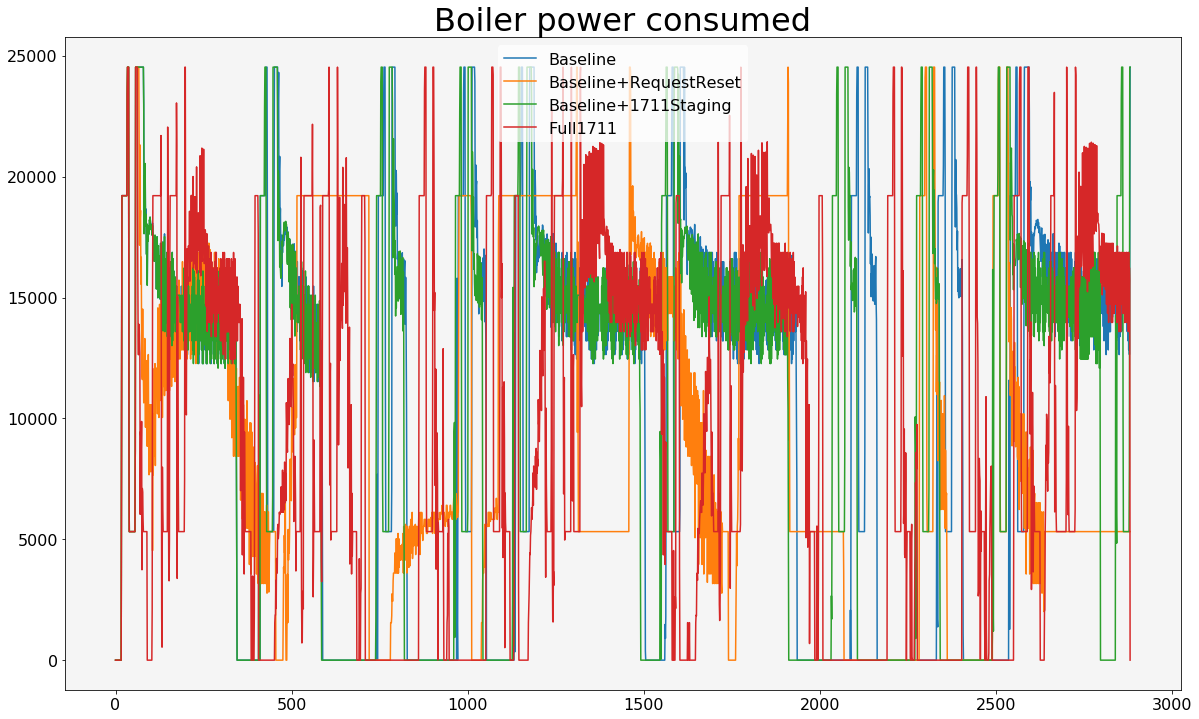

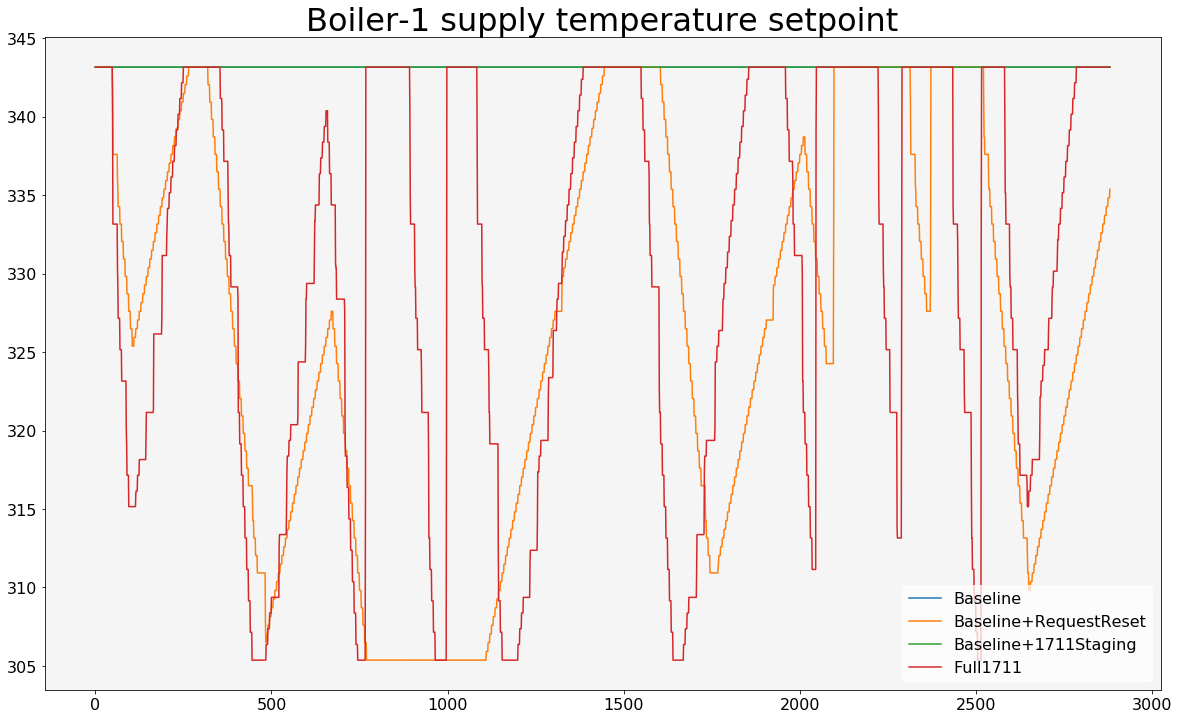

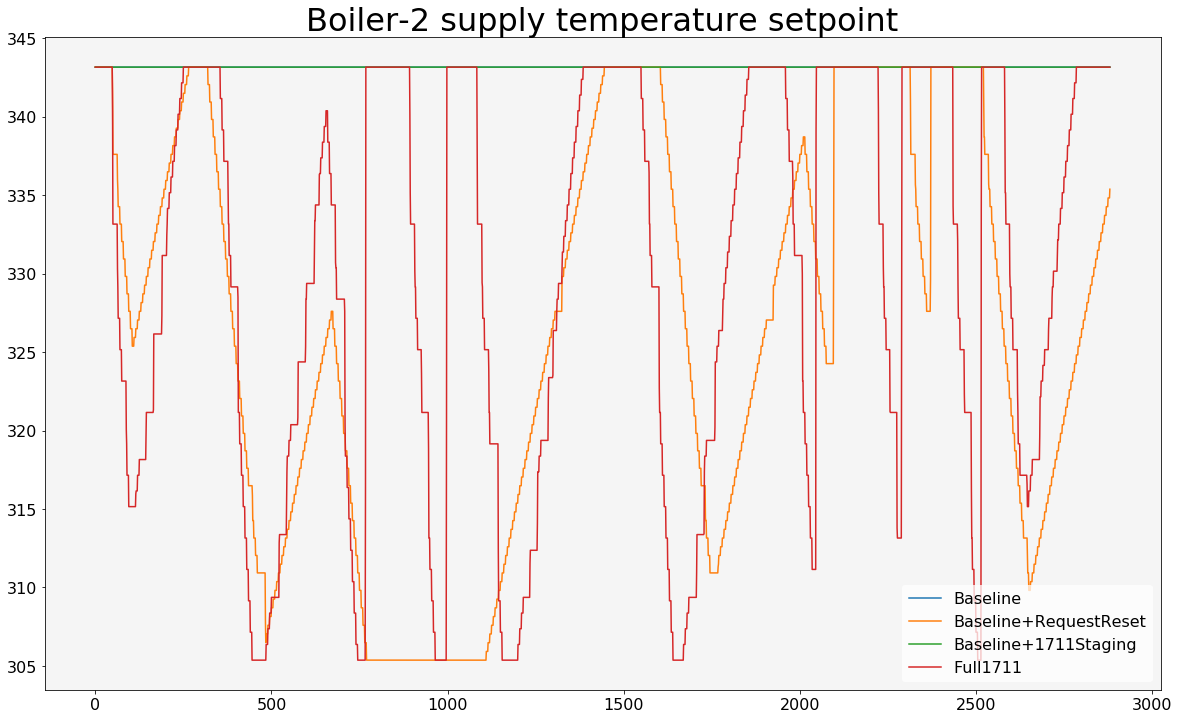

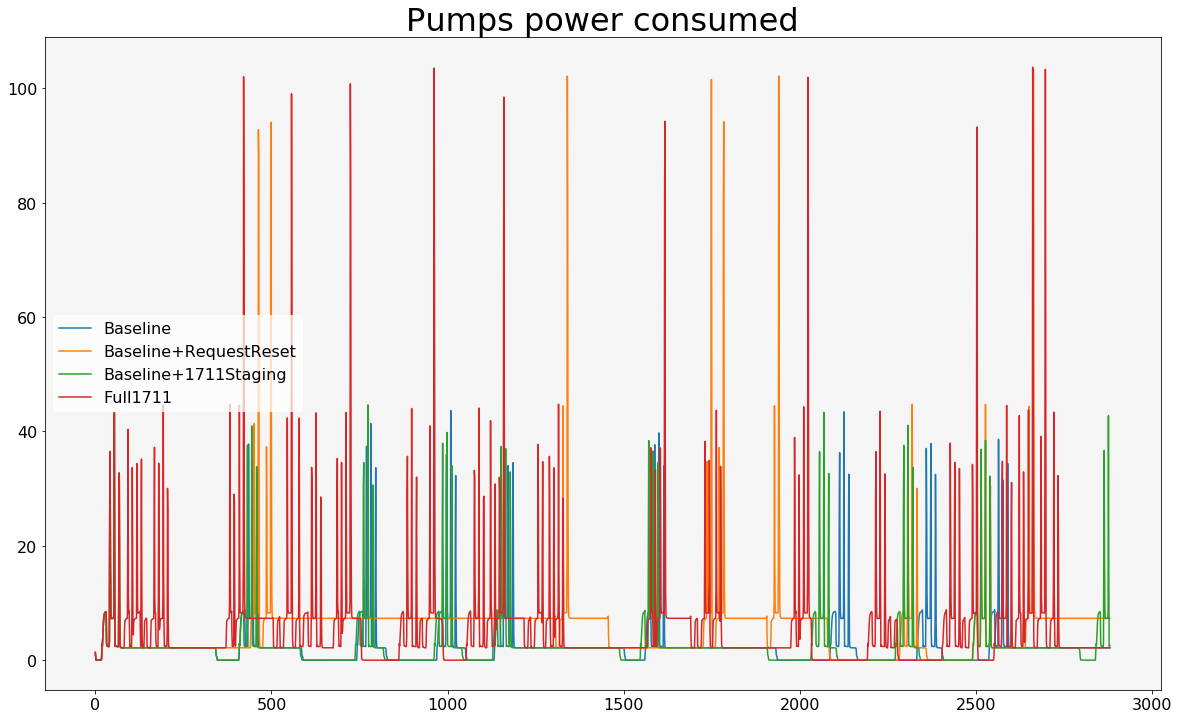

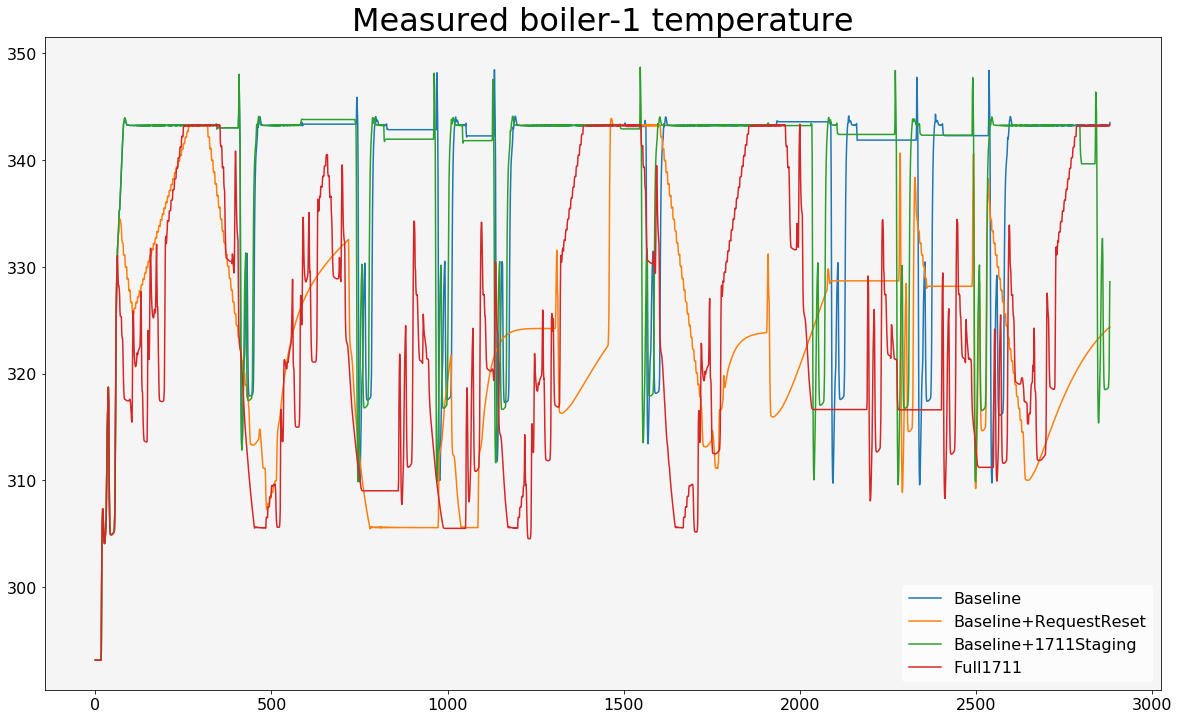

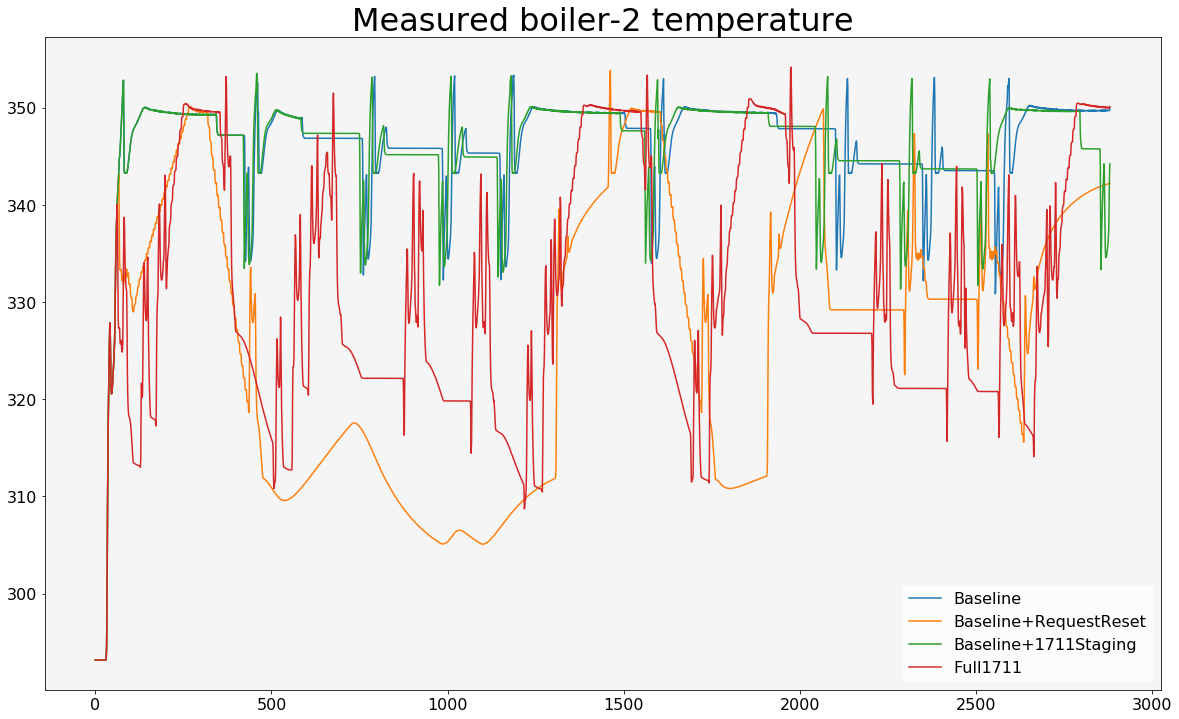

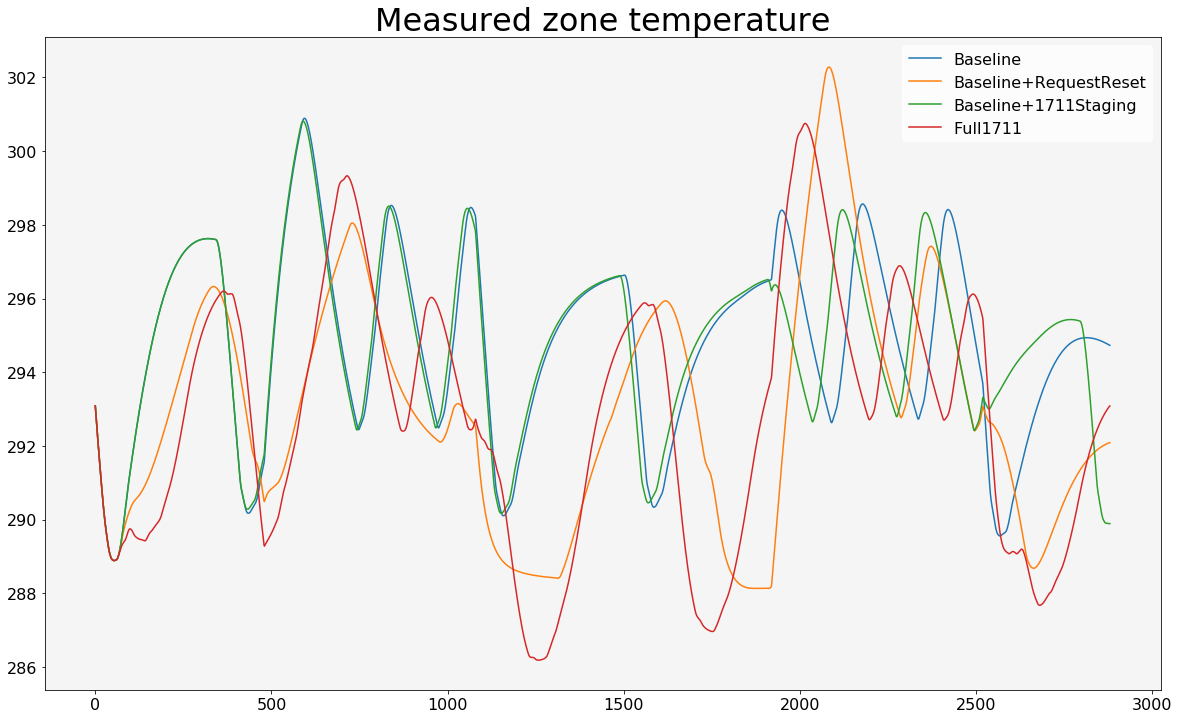

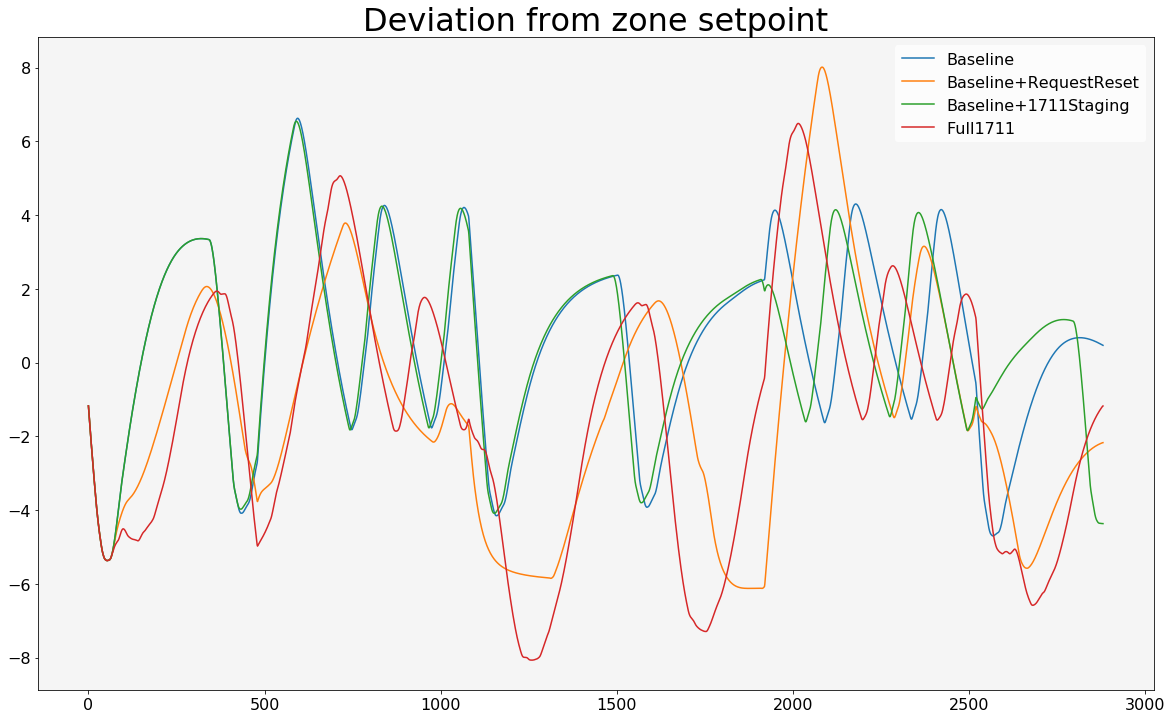

In [115]:
plt.close()
for datapoint in list(line_plot_datapoints):
    plt.figure(figsize=(20,12))
    plt.title(datapoint, fontsize=32)
    for result_file in list_of_results:
#         print(os.getcwd())
        file_data = pd.read_csv('./extracted_simulation_data/' + result_file)
#         print(file_data.head())
        reqd_data = file_data[line_plot_datapoints[datapoint]]
        reqd_data.describe()
        plt.plot(reqd_data)
    plt.legend(['Baseline', 'Baseline+RequestReset', 'Baseline+1711Staging', 'Full1711'], fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.savefig((datapoint + '.png'))
    plt.show()    

### Bar charts

In [116]:
line_plot_datapoints = {
    'Boiler power consumed': 'total_boiler_consumption',
    'Pumps power consumed': 'pumps_power_consumption',
    'Total plant energy consumed': 'total_plant_consumption'
}

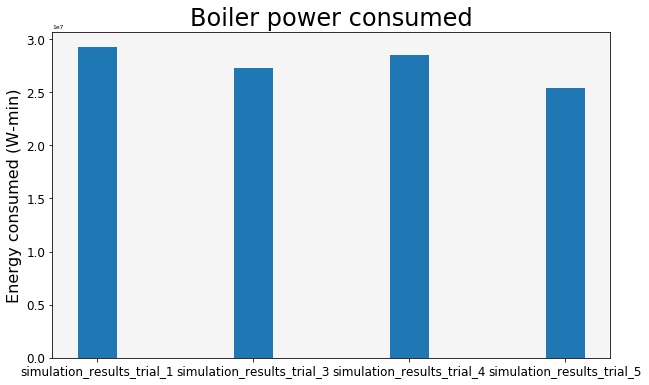

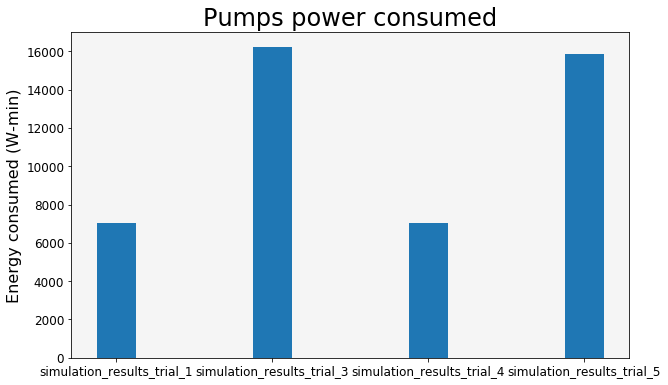

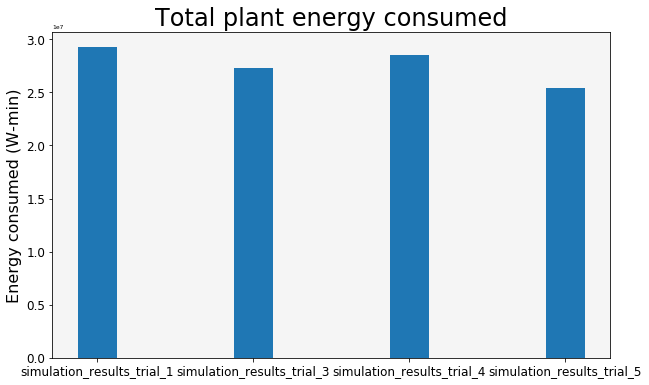

In [117]:
plt.close()
for datapoint in list(line_plot_datapoints):
    plt.figure(figsize=(10, 6))
    plt.title(datapoint, fontsize=24)
    data_summary = pd.DataFrame()
    for result_file in list_of_results:
        file_data = pd.read_csv('./extracted_simulation_data/' + result_file)
        reqd_data = file_data[line_plot_datapoints[datapoint]].sum()
#         print(reqd_data)
        data_summary[result_file.rstrip('.csv')] = [reqd_data]
    width = 0.25
    x = np.arange(len(data_summary.columns))
    plt.bar(data_summary.columns, data_summary.iloc[0].values, width)
    plt.ylabel('Energy consumed (W-min)', fontsize=16)
#     plt.yaxes(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(data_summary.columns, fontsize=12)
    plt.show()

In [118]:
plt.close()
# data_summary = pd.DataFrame(columns = scenario_names)
data_summary = pd.DataFrame(columns = list(line_plot_datapoints))
data_summary['scenario_name'] = scenario_names
for datapoint in list(line_plot_datapoints):
    for result_file in list_of_results:
        file_data = pd.read_csv('./extracted_simulation_data/' + result_file)
        reqd_data = file_data[line_plot_datapoints[datapoint]].sum()
        reqd_row = (data_summary['scenario_name'] == result_file.rstrip('.csv')).values
#         print(reqd_row)
        reqd_column = (data_summary.columns == datapoint)
#         print(reqd_column)
#         print(reqd_data)
        data_summary.iloc[reqd_row, reqd_column] = reqd_data

In [119]:
data_summary['%age reduction in plant energy consumption'] = (max(data_summary['Total plant energy consumed']) - data_summary['Total plant energy consumed']) * 100 / max(data_summary['Total plant energy consumed'])

In [120]:
data_summary.to_csv('data_summary.csv')

# Old Plots

## Comparison of zone thermal load to boiler power generation

In [ ]:
plt.plot(power_data['zone_thermal_load'])
plt.plot(power_data['total_boiler_generation'])
plt.legend(['Zone thermal load', 'Total boiler power generation'])
plt.show()

In [ ]:
plt.plot(simulation_data['boiler1_temp'])
plt.plot(simulation_data['boiler2_temp'])
plt.legend(['Boiler-1 temperature', 'Boiler-2 temperature'])
plt.show()

In [ ]:
plt.plot(simulation_data['boiler1_supSet'])
plt.plot(simulation_data['boiler1_supply_temp'])
plt.legend(['Boiler-1 supply temperature setpoint', 'Boiler-1 measured supply temperature'])
plt.show()

In [ ]:
plt.plot(simulation_data['boiler2_supSet'])
plt.plot(simulation_data['boiler2_supply_temp'])
plt.legend(['Boiler-2 supply temperature setpoint', 'Boiler-2 measured supply temperature'])
plt.show()